The notebook is meant to reqrite hdf5 files, specifically the COMPAS_Output_wWeights_SM_2.h5 file in order to add WD+WD to the BSE_Double_Compact objects to eventually calculate the rate of WD+WD,

My steps to do this include:,
- Making the DCO table shorter so that it only encompasses things that I actually need,
- Making an empty table that has the same columns as the DCO table,
- Masking the original system parameters so that I only select for WD+WD that merge within a Hubble time,
    - Computing the coalescence time,
    - Checking if the binary merges within a hubble time,
- Adding all the information about these WD+WD to the empty table and then adding this table to the original DCO table,
- Using this new table to create a new COMPAS output to then run fastcosmicintegration on,
- Changing FastCosmisIntegration.py so that BWD are added as a DCO type + ,
- run FastCosmicIntegration via the blackbox method and compare with the Brill Paper Lieke sent"

Let's first look at the columns in BSE_DCOs to see what information we need of the WD+WD to gather

In [1]:
#importing, make sure the kernel is correct or the module will be unknown
import h5py as h5
import pandas as pd
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt

/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <

In [2]:
# reading in the HDF5 file - this file is the AIS file that we should expect many WDs in
pathToWDWD_edit_H5 = '/mnt/home/msantiago/ceph/data/CosmicIntegration/CosmicIntegration/COMPAS_Output_wWeights_SM_3.h5' #path of the hdf5 file
Data_WD_edit = h5.File(pathToWDWD_edit_H5)

In [3]:
# we want to read in the bse_system_paramtetrs to get information about thes different systems
DCO_OG = pd.DataFrame() # making a pandas dataframe
for key in Data_WD_edit["BSE_Double_Compact_Objects"].keys(): #looping through the \"keys\" or paramters in BSE_System_Parameters
    DCO_OG[key] = Data_WD_edit["BSE_Double_Compact_Objects"][key][()] # adding these columns to the dataframe"

In [4]:
pd.set_option('display.max_columns', None) # allows us to see all of the columns
display(DCO_OG)

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),Optimistic_CE,Record_Type,Recycled_NS(1),Recycled_NS(2),SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,dmMT(1),dmMT(2),dmWinds(1),dmWinds(2),mixture_weight
0,0,1.318672e+18,9.134209e-01,0,b'NA ',b'NA ',10.459820,8.482785,0,0.000360,0,1,0,0,43,1336.614568,14,14,9.739419,0.000000,0.000000,0.0,-0.009208,10.000000
1,0,3.624469e+16,2.371437e-16,0,b'NA ',b'NA ',28.885311,16.624722,0,0.001622,0,1,0,0,52,222.597147,14,14,5.297461,0.000000,0.000000,0.0,-0.001058,10.000000
2,0,2.650765e+20,1.692382e-01,0,b'NA ',b'NA ',12.762462,11.971810,0,0.002880,0,1,0,0,70,1361.626335,14,14,7.190346,0.000000,0.000000,0.0,-0.002120,10.000000
3,0,2.888669e+17,6.036533e-01,0,b'NA ',b'NA ',15.414209,11.071106,0,0.000270,0,1,0,0,90,374.800786,14,14,7.631813,0.000000,0.000000,0.0,-0.004239,10.000000
4,0,9.449306e+21,5.251794e-01,0,b'NA ',b'NA ',15.417287,7.682713,0,0.012454,0,1,0,0,626,3967.723936,14,14,9.508827,0.000000,0.000000,0.0,-0.006800,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,5.232005e+01,1.560227e-01,0,b'2 ',b'4-8 ',1.260099,1.223862,1,0.000228,0,1,1,0,248108,0.005101,13,13,42.525732,0.000099,-1.301316,0.0,0.000000,2.610643
496,1,9.297640e+07,7.835050e-01,0,b'2 ',b'4-8 ',1.260003,1.186819,0,0.001500,0,1,1,0,373791,0.411702,13,13,55.144683,0.000003,-0.886278,0.0,0.000000,0.369471
497,1,6.076656e+03,4.515486e-01,0,b'2 ',b'5-8 ',1.220009,1.222469,1,0.000488,0,1,1,0,587694,0.019758,13,13,48.745117,0.000045,-1.077372,0.0,0.000000,0.590270
498,1,4.979351e+05,7.315218e-01,0,b'2 ',b'5 ',1.260000,1.223407,0,0.001254,0,1,0,0,639506,0.096072,13,13,50.429547,0.000000,0.000000,0.0,-0.000042,6.083373


Let's drop any columns we don't think are necessary to have anymore

In [5]:
DCO_OG = DCO_OG.drop(['dmMT(1)','dmMT(2)','dmWinds(1)','dmWinds(2)'],axis=1)

In [6]:
DCO_OG

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),Optimistic_CE,Record_Type,Recycled_NS(1),Recycled_NS(2),SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,mixture_weight
0,0,1.318672e+18,9.134209e-01,0,b'NA ',b'NA ',10.459820,8.482785,0,0.000360,0,1,0,0,43,1336.614568,14,14,9.739419,10.000000
1,0,3.624469e+16,2.371437e-16,0,b'NA ',b'NA ',28.885311,16.624722,0,0.001622,0,1,0,0,52,222.597147,14,14,5.297461,10.000000
2,0,2.650765e+20,1.692382e-01,0,b'NA ',b'NA ',12.762462,11.971810,0,0.002880,0,1,0,0,70,1361.626335,14,14,7.190346,10.000000
3,0,2.888669e+17,6.036533e-01,0,b'NA ',b'NA ',15.414209,11.071106,0,0.000270,0,1,0,0,90,374.800786,14,14,7.631813,10.000000
4,0,9.449306e+21,5.251794e-01,0,b'NA ',b'NA ',15.417287,7.682713,0,0.012454,0,1,0,0,626,3967.723936,14,14,9.508827,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,5.232005e+01,1.560227e-01,0,b'2 ',b'4-8 ',1.260099,1.223862,1,0.000228,0,1,1,0,248108,0.005101,13,13,42.525732,2.610643
496,1,9.297640e+07,7.835050e-01,0,b'2 ',b'4-8 ',1.260003,1.186819,0,0.001500,0,1,1,0,373791,0.411702,13,13,55.144683,0.369471
497,1,6.076656e+03,4.515486e-01,0,b'2 ',b'5-8 ',1.220009,1.222469,1,0.000488,0,1,1,0,587694,0.019758,13,13,48.745117,0.590270
498,1,4.979351e+05,7.315218e-01,0,b'2 ',b'5 ',1.260000,1.223407,0,0.001254,0,1,0,0,639506,0.096072,13,13,50.429547,6.083373


Let's now make an empty dataframe that has the same columns as the dataframe above

In [7]:
dco_column_names = DCO_OG.columns

In [8]:
WD_DCO_TABLE = pd.DataFrame(columns=[dco_column_names[0],dco_column_names[1],dco_column_names[2],dco_column_names[3],dco_column_names[4],dco_column_names[5],dco_column_names[6], \
dco_column_names[7],dco_column_names[8],dco_column_names[9],dco_column_names[10],dco_column_names[11],dco_column_names[12],dco_column_names[13],dco_column_names[14],dco_column_names[15],\
dco_column_names[16],dco_column_names[17],dco_column_names[18],dco_column_names[19]])

Now that we see what columns are needed for BSE_DCOs let's look at BSE_System_Parameters to look at what information we already have

In [9]:
# we want to read in the bse_system_paramtetrs to get information about thes different systems
WD_SP_edit = pd.DataFrame() # making a pandas dataframe

for key in Data_WD_edit["BSE_System_Parameters"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters
    WD_SP_edit[key] = Data_WD_edit["BSE_System_Parameters"][key][()] # adding these columns to the dataframe

In [10]:
pd.set_option('display.max_columns', None) # allows us to see all of the columns
display(WD_SP_edit)

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis,SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight
0,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'1 ',b'NA ',1.278098,0.401838,1.278098,0.401838,1,0,0.000452,0.000452,0.0,0.0,0,1,0,0.162910,0.282618,5.951440,1.455541,1.155394,0.500548,4.676608,4.774868,2.289382,0.010647,265.0,265.0,30.0,30.0,1,0,1,0,0.0,1397.530986,0,1.0,10.000000
1,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'1-2 ',b'5 ',0.209222,0.803968,1.406292,1.404112,1,0,0.000488,0.000488,0.0,0.0,0,1,1,0.997185,0.720324,5.859431,0.000719,-0.406432,-0.556034,6.277157,0.580181,0.070168,0.033188,265.0,265.0,30.0,30.0,10,8,1,1,0.0,2269.769501,0,1.0,10.000000
2,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'NA ',b'NA ',0.588002,0.179199,0.947511,0.179199,0,0,0.000237,0.000237,0.0,0.0,0,1,2,0.185082,0.025926,5.853044,3.453631,-0.129719,-0.367118,3.045768,2.075555,5919.886036,18.739084,265.0,265.0,30.0,30.0,11,0,1,0,0.0,13757.046608,0,1.0,10.000000
3,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'1-2 ',b'5 ',0.174864,0.705756,1.700805,1.687579,0,0,0.022502,0.022502,0.0,0.0,0,1,3,0.070725,0.708148,5.277555,1.827808,0.021657,-0.126211,3.577089,5.631576,1.818213,0.037819,265.0,265.0,30.0,30.0,10,11,1,1,0.0,13734.226416,0,1.0,9.999997
4,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'NA ',b'NA ',0.638356,0.647829,1.289238,0.647829,0,0,0.000736,0.000736,0.0,0.0,0,1,4,0.900621,0.547232,1.085077,6.111556,0.444085,0.196372,3.826684,1.357730,2101.091300,6.481766,265.0,265.0,30.0,30.0,11,0,1,0,0.0,13782.210927,0,1.0,9.999677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'NA ',b'NA ',0.759623,0.708064,1.639487,1.406327,0,0,0.000319,0.000319,0.0,0.0,0,1,999995,0.719032,0.460826,3.264003,4.386358,1.298580,1.137955,1.846045,3.903730,8070.434316,18.062579,265.0,265.0,30.0,30.0,11,11,1,1,0.0,14187.533754,0,1.0,0.416246
999996,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'NA ',b'NA ',0.906897,0.830446,4.103825,3.571561,0,0,0.025604,0.025604,0.0,0.0,0,1,999996,0.376224,0.083434,3.617568,2.676623,-0.381096,-0.559024,3.960636,2.509714,25738.967556,26.885431,265.0,265.0,30.0,30.0,11,11,1,1,0.0,13901.519164,0,1.0,0.087445
999997,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'NA ',b'NA ',1.050281,1.099315,3.633960,2.973530,0,0,0.000209,0.000209,0.0,0.0,0,1,999997,0.223393,0.947942,2.010605,1.238487,-0.178701,0.217135,0.529336,0.742038,492165.870155,741.053113,265.0,265.0,30.0,30.0,11,11,1,1,0.0,13922.219796,0,1.0,0.122957
999998,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'NA ',b'NA ',1.381834,1.081376,5.585732,3.915191,0,0,0.000447,0.000447,0.0,0.0,0,1,999998,0.796172,0.013945,5.331922,1.883791,-0.859814,-0.800516,5.360359,1.443981,120948.185496,164.104198,265.0,265.0,30.0,30.0,12,11,1,1,0.0,13772.504859,0,1.0,0.128802


The columns that I do not need to calculate the coalescence time for the WD+WD or do not need for the DCO table:

- Applied_Kick_Magnitude(1) & Applied_Kick_Magnitude(2)
- CE_Alpha
- CH_on_MS(1) & CH_on_MS(2)
- Drawn_Kick_Magnitude(1) & Drawn_Kick_Magnitude(2)
- Equilibrated_At_Birth
- Error
- Evolution_Status
- LBV_Factor
- Mass@ZAMS(1) & Mass@ZAMS(2)
- Merger
- Merger_At_Birth
- Metallicity@ZAMS(2)
- Omega@ZAMS(1) & Omega@ZAMS(2)
- SN_Kick_Magnitude_Random_Number(1) & SN_Kick_Magnitude_Random_Number(2)
- SN_Kick_Mean_Anomaly(1) & SN_Kick_Mean_Anomaly(2)
- SN_Kick_Phi(1) & SN_Kick_Phi(2)
- SN_Kick_Theta(1) & SN_Kick_Theta(2)
- SemiMajorAxis@ZAMS
- Sigma_Kick_CCSN_BH
- Sigma_Kick_CCSN_NS
- Sigma_Kick_ECSN
- Sigma_Kick_USSN
- Stellar_Type@ZAMS(1) & Stellar_Type@ZAMS(2)
- SystemicSpeed
- Unbound

In the DCO table the @DCO marking is the same as the final state of the WD+WD"

In [11]:
WD_SP_edit = WD_SP_edit.drop(['Applied_Kick_Magnitude(1)','Applied_Kick_Magnitude(2)','CE_Alpha','CH_on_MS(1)', \
'CH_on_MS(2)','Drawn_Kick_Magnitude(1)','Drawn_Kick_Magnitude(2)','Equilibrated_At_Birth','Error','Evolution_Status',\
'Eccentricity@ZAMS','LBV_Factor','Mass@ZAMS(1)','Mass@ZAMS(2)','Merger','Merger_At_Birth','Metallicity@ZAMS(2)','Omega@ZAMS(1)','Omega@ZAMS(2)',\
'SN_Kick_Magnitude_Random_Number(1)','SN_Kick_Magnitude_Random_Number(2)','SN_Kick_Mean_Anomaly(1)','SN_Kick_Mean_Anomaly(2)', \
'SN_Kick_Phi(1)','SN_Kick_Phi(2)','SN_Kick_Theta(1)','SN_Kick_Theta(2)','SemiMajorAxis@ZAMS','Sigma_Kick_CCSN_BH','Sigma_Kick_CCSN_NS','Sigma_Kick_ECSN','Sigma_Kick_USSN','Stellar_Type@ZAMS(1)','Stellar_Type@ZAMS(2)','SystemicSpeed','Unbound','WR_Factor'],axis=1)

In [12]:
WD_SP_edit

,CE_Event_Counter,Eccentricity,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Metallicity@ZAMS(1),Optimistic_CE,Record_Type,SEED,SemiMajorAxis,Stellar_Type(1),Stellar_Type(2),Time,mixture_weight
0,1,0.0,1,b'1 ',b'NA ',1.278098,0.401838,0.000452,0,1,0,2.289382,1,0,1397.530986,10.000000
1,1,0.0,1,b'1-2 ',b'5 ',0.209222,0.803968,0.000488,0,1,1,0.070168,10,8,2269.769501,10.000000
2,0,0.0,0,b'NA ',b'NA ',0.588002,0.179199,0.000237,0,1,2,5919.886036,11,0,13757.046608,10.000000
3,1,0.0,0,b'1-2 ',b'5 ',0.174864,0.705756,0.022502,0,1,3,1.818213,10,11,13734.226416,9.999997
4,0,0.0,0,b'NA ',b'NA ',0.638356,0.647829,0.000736,0,1,4,2101.091300,11,0,13782.210927,9.999677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.0,0,b'NA ',b'NA ',0.759623,0.708064,0.000319,0,1,999995,8070.434316,11,11,14187.533754,0.416246
999996,0,0.0,0,b'NA ',b'NA ',0.906897,0.830446,0.025604,0,1,999996,25738.967556,11,11,13901.519164,0.087445
999997,0,0.0,0,b'NA ',b'NA ',1.050281,1.099315,0.000209,0,1,999997,492165.870155,11,11,13922.219796,0.122957
999998,0,0.0,0,b'NA ',b'NA ',1.381834,1.081376,0.000447,0,1,999998,120948.185496,12,11,13772.504859,0.128802


This is four less columns than the DCO table because I must add the coalescence time column as well as the merges in hubble time column (and we do not have recycled NS information)

#### Let's calculate the coalescence time and merges hubble time columns

Before doing this though we need to make sure we are only calculating these parameters for WD+WD

In [13]:
def WD_BINARY_BOOLS(dataframe):

# let's first look at if there are only helium white dwarf WD binaries
    HeWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==10,dataframe['Stellar_Type(2)']==10)
# then carbon oxygen WD
    COWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==11,dataframe['Stellar_Type(2)']==11)
# then oxgen neon WD
    ONeWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==12,dataframe['Stellar_Type(2)']==12)

# let's look at the combination of WD binaries

# Helium WD combos
    HeCOWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==10,dataframe['Stellar_Type(2)']==11)
    HeONeWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==10,dataframe['Stellar_Type(2)']==12)

# Carbon Oxygen WD combos
    COHeWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==11,dataframe['Stellar_Type(2)']==10)
    COONeWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==11,dataframe['Stellar_Type(2)']==12)

# Oxygen Neon WD combos
    ONeHeWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==12,dataframe['Stellar_Type(2)']==10)
    ONeCOWD_bool = np.logical_and(dataframe['Stellar_Type(1)']==12,dataframe['Stellar_Type(2)']==11)

    # let's return all of these bools
    return(HeWD_bool,COWD_bool,ONeWD_bool,HeCOWD_bool,HeONeWD_bool,COHeWD_bool,COONeWD_bool,ONeHeWD_bool,ONeCOWD_bool)


In [14]:
# let's now create a dataframe where the above criteria is met based on all of the bools

WDWD_EDIT_SYS = WD_SP_edit.loc[(WD_BINARY_BOOLS(WD_SP_edit)[0])|(WD_BINARY_BOOLS(WD_SP_edit)[1])|(WD_BINARY_BOOLS(WD_SP_edit)[2])|(WD_BINARY_BOOLS(WD_SP_edit)[3])|(WD_BINARY_BOOLS(WD_SP_edit)[4])|(WD_BINARY_BOOLS(WD_SP_edit)[5])|(WD_BINARY_BOOLS(WD_SP_edit)[6])|(WD_BINARY_BOOLS(WD_SP_edit)[7])|(WD_BINARY_BOOLS(WD_SP_edit)[8])]
WDWD_EDIT_SYS

,CE_Event_Counter,Eccentricity,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Metallicity@ZAMS(1),Optimistic_CE,Record_Type,SEED,SemiMajorAxis,Stellar_Type(1),Stellar_Type(2),Time,mixture_weight
3,1,0.0,0,b'1-2 ',b'5 ',0.174864,0.705756,0.022502,0,1,3,1.818213,10,11,13734.226416,9.999997
5,0,0.0,0,b'NA ',b'NA ',0.618584,0.594434,0.001643,0,1,5,10263.665097,11,11,14127.407871,0.375554
6,0,0.0,0,b'NA ',b'NA ',0.647687,0.557429,0.001093,0,1,6,3519.609779,11,11,14037.450094,8.699165
9,0,0.0,0,b'5 ',b'NA ',1.113402,1.107227,0.000138,0,1,9,4344.926196,11,11,13828.031985,0.115519
10,1,0.0,0,b'1-2 ',b'3 ',0.151958,0.368583,0.000847,0,1,10,1.962806,10,10,13727.752620,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.0,0,b'NA ',b'NA ',0.759623,0.708064,0.000319,0,1,999995,8070.434316,11,11,14187.533754,0.416246
999996,0,0.0,0,b'NA ',b'NA ',0.906897,0.830446,0.025604,0,1,999996,25738.967556,11,11,13901.519164,0.087445
999997,0,0.0,0,b'NA ',b'NA ',1.050281,1.099315,0.000209,0,1,999997,492165.870155,11,11,13922.219796,0.122957
999998,0,0.0,0,b'NA ',b'NA ',1.381834,1.081376,0.000447,0,1,999998,120948.185496,12,11,13772.504859,0.128802


In the equation for coalescence time, M1 refers to the more massive star whereas M2 refers to the less massive one. I need to make new columns (witht eh help of Lieke) to find these more massive and less massive stars in each bianry. Let's do a check to see if our colaescence times match the COMPAS calculations

In [15]:
# let's now make the definition for the coalescence time (no variations for the very small or very larger eccentiricies)
# this function requires an input of units

def tgw(a,e,Mmoremass,Mlessmass,Data,key,parameter):

    """
    Calcualte the coalescence time (inspiral time)
    a = semi major axis (expected in AU or Rsun)
    e = eccentricity
    Mmoremass = mass of the more massive compact object (expected in solar masses!)
    Mlessmass = mass of the less massive compact object (expected in solar masses!)
    """

    SYS = Data[key]
    sep_unit = SYS[parameter].attrs['units']
    if sep_unit == b'Rsol':
        a = (a * u.Rsun).to(u.m)

    elif sep_unit == b'AU':
        a = (a * u.AU).to(u.m)      

    Mmoremass = (Mmoremass * u.Msun).to(u.kg)
    Mlessmass = (Mlessmass * u.Msun).to(u.kg)

    tc = ((((5*((a)**4)*(const.c**5))/(256*(const.G**3)*(Mmoremass)*(Mlessmass)*((Mmoremass)+(Mlessmass))))*(1+(0.27*e**10)+(0.33*e**20)+(0.2*e**1000))*(1-(e**2))**(7/2)))*((3.171e-8)*(u.yr/u.s))*((1e-6)*(u.Myr/u.yr))

    return tc.values

In [16]:
unit_dict = {b'Rsol':u.Rsun,
             b'AU':u.AU}

print(unit_dict[b'AU'])

AU


In [17]:
# let's first look at the units of some parameters to see if anything must be converted
SPs_WD = Data_WD_edit['BSE_System_Parameters']
print(SPs_WD['Mass(1)'].attrs['units']) 
print(SPs_WD['SemiMajorAxis'].attrs['units'])
print(SPs_WD['Time'].attrs['units'])

b'Msol'
b'Rsol'
b'Myr'


In [18]:
# let's first look at the units of some parameters to see if anything must be converted
dcos_WD = Data_WD_edit['BSE_Double_Compact_Objects']
print(dcos_WD['Mass(1)'].attrs['units']) 
print(dcos_WD['SemiMajorAxis@DCO'].attrs['units'])
print(dcos_WD['Time'].attrs['units'])

b'Msol'
b'AU'
b'Myr'


/tmp/ipykernel_3594210/414090992.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergingDCO['M_moremass'] = mergingDCO[['Mass(1)', 'Mass(2)']].max(axis=1)
/tmp/ipykernel_3594210/414090992.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergingDCO['M_lessmass'] = mergingDCO[['Mass(1)', 'Mass(2)']].min(axis=1)


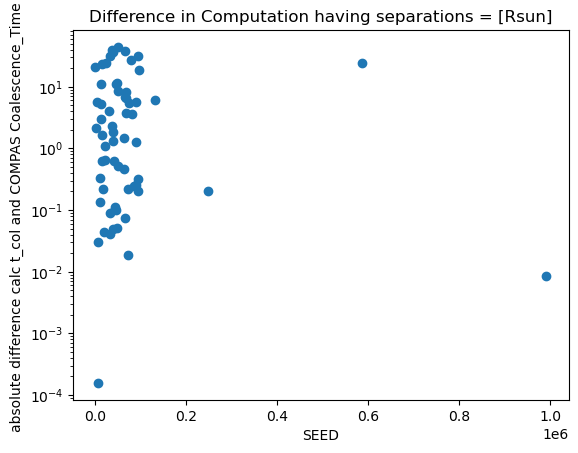

In [19]:
# looking at how accurate the coaslescence calulations are
mergingDCO = DCO_OG[DCO_OG['Merges_Hubble_Time'] == 1]

# Add columns for the more and less massive compact object
mergingDCO['M_moremass'] = mergingDCO[['Mass(1)', 'Mass(2)']].max(axis=1)
mergingDCO['M_lessmass'] = mergingDCO[['Mass(1)', 'Mass(2)']].min(axis=1)

time_gw = tgw((mergingDCO['SemiMajorAxis@DCO'].values),(mergingDCO['Eccentricity@DCO']),(mergingDCO['M_moremass'].values),(mergingDCO['M_lessmass'].values),Data_WD_edit,'BSE_Double_Compact_Objects','SemiMajorAxis@DCO')

plt.scatter(mergingDCO['SEED'], abs(time_gw - mergingDCO['Coalescence_Time']) )
plt.xlabel("SEED")
plt.ylabel('absolute difference calc t_col and COMPAS Coalescence_Time ')
plt.yscale('log')
plt.title("Difference in Computation having separations = [Rsun]")
plt.show()

#### Let's now calculated the coalescence time to our table of WD+WD

In [20]:
# Add columns for the more and less massive compact object

WDWD_EDIT_SYS['M_moremass'] = WDWD_EDIT_SYS[['Mass(1)', 'Mass(2)']].max(axis=1)
WDWD_EDIT_SYS['M_lessmass'] = WDWD_EDIT_SYS[['Mass(1)', 'Mass(2)']].min(axis=1)

/tmp/ipykernel_3594210/3822573989.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WDWD_EDIT_SYS['M_moremass'] = WDWD_EDIT_SYS[['Mass(1)', 'Mass(2)']].max(axis=1)
/tmp/ipykernel_3594210/3822573989.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WDWD_EDIT_SYS['M_lessmass'] = WDWD_EDIT_SYS[['Mass(1)', 'Mass(2)']].min(axis=1)


In [23]:
time_col_wd = tgw((WDWD_EDIT_SYS['SemiMajorAxis'].values),(WDWD_EDIT_SYS['Eccentricity']),(WDWD_EDIT_SYS['M_moremass'].values),(WDWD_EDIT_SYS['M_lessmass'].values),Data_WD_edit,'BSE_System_Parameters','SemiMajorAxis')

In [24]:
# let's insert the check if there was a merger before hubble time into our dataframe

# only run this cell once per table creation
WDWD_EDIT_SYS.insert(1,"Coalescence_Time",time_col_wd,True)
WDWD_EDIT_SYS

,CE_Event_Counter,Coalescence_Time,Eccentricity,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Metallicity@ZAMS(1),Optimistic_CE,Record_Type,SEED,SemiMajorAxis,Stellar_Type(1),Stellar_Type(2),Time,mixture_weight,M_moremass,M_lessmass
3,1,1.511540e+04,0.0,0,b'1-2 ',b'5 ',0.174864,0.705756,0.022502,0,1,3,1.818213,10,11,13734.226416,9.999997,0.705756,0.174864
5,0,3.739590e+18,0.0,0,b'NA ',b'NA ',0.618584,0.594434,0.001643,0,1,5,10263.665097,11,11,14127.407871,0.375554,0.618584,0.594434
6,0,5.301228e+16,0.0,0,b'NA ',b'NA ',0.647687,0.557429,0.001093,0,1,6,3519.609779,11,11,14037.450094,8.699165,0.647687,0.557429
9,0,1.956806e+16,0.0,0,b'5 ',b'NA ',1.113402,1.107227,0.000138,0,1,9,4344.926196,11,11,13828.031985,0.115519,1.113402,1.107227
10,1,7.652042e+04,0.0,0,b'1-2 ',b'3 ',0.151958,0.368583,0.000847,0,1,10,1.962806,10,10,13727.752620,10.000000,0.368583,0.151958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,8.077308e+17,0.0,0,b'NA ',b'NA ',0.759623,0.708064,0.000319,0,1,999995,8070.434316,11,11,14187.533754,0.416246,0.759623,0.708064
999996,0,5.041878e+19,0.0,0,b'NA ',b'NA ',0.906897,0.830446,0.025604,0,1,999996,25738.967556,11,11,13901.519164,0.087445,0.906897,0.830446
999997,0,3.553400e+24,0.0,0,b'NA ',b'NA ',1.050281,1.099315,0.000209,0,1,999997,492165.870155,11,11,13922.219796,0.122957,1.099315,1.050281
999998,0,8.738700e+21,0.0,0,b'NA ',b'NA ',1.381834,1.081376,0.000447,0,1,999998,120948.185496,12,11,13772.504859,0.128802,1.381834,1.081376


In [25]:
# in case you run the cell above more than once here is a way to remove the extra column
# WDWD_EDIT_SYS = WDWD_EDIT_SYS.drop('Coalescence_Time', axis=1)

We now need to calcualte the delay time to then see if this time is within a hubble time

In [26]:
# let's convert the columns of the data frame into numpy arrays to be able to do operations with them
time = np.array(WDWD_EDIT_SYS['Time'])
t_col = np.array(WDWD_EDIT_SYS['Coalescence_Time'])

t_delay = [] # this will hold the delay time in Myr

for binaries in range(WDWD_EDIT_SYS.shape[0]):

    delay = time[binaries] + t_col[binaries] # adding the two values together to get the delay time
    t_delay.append(delay)

In [27]:
# first let's take the delay time column and make it a numpy array
delay_time = np.array(t_delay)

# the age of the universe
age_universe = (13.7e9)*(1e-6) # converting from yr to Myr

hubble_merger = []

for times in delay_time:

    if (times > age_universe):
        hubble_merger.append(0)

    elif (times < age_universe):
        hubble_merger.append(1)

In [28]:
# let's insert the check if there was a merger before hubble time into our dataframe

# only run this cell once per table creation
WDWD_EDIT_SYS.insert(8,"Merges_Hubble_Time",hubble_merger,True)

In [29]:
# in case you need to remove the column
# WDWD_SYS = WDWD_SYS.drop('Merges_Hubble_Time', axis=1)

In [30]:
WDWD_EDIT_SYS

,CE_Event_Counter,Coalescence_Time,Eccentricity,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),Optimistic_CE,Record_Type,SEED,SemiMajorAxis,Stellar_Type(1),Stellar_Type(2),Time,mixture_weight,M_moremass,M_lessmass
3,1,1.511540e+04,0.0,0,b'1-2 ',b'5 ',0.174864,0.705756,0,0.022502,0,1,3,1.818213,10,11,13734.226416,9.999997,0.705756,0.174864
5,0,3.739590e+18,0.0,0,b'NA ',b'NA ',0.618584,0.594434,0,0.001643,0,1,5,10263.665097,11,11,14127.407871,0.375554,0.618584,0.594434
6,0,5.301228e+16,0.0,0,b'NA ',b'NA ',0.647687,0.557429,0,0.001093,0,1,6,3519.609779,11,11,14037.450094,8.699165,0.647687,0.557429
9,0,1.956806e+16,0.0,0,b'5 ',b'NA ',1.113402,1.107227,0,0.000138,0,1,9,4344.926196,11,11,13828.031985,0.115519,1.113402,1.107227
10,1,7.652042e+04,0.0,0,b'1-2 ',b'3 ',0.151958,0.368583,0,0.000847,0,1,10,1.962806,10,10,13727.752620,10.000000,0.368583,0.151958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,8.077308e+17,0.0,0,b'NA ',b'NA ',0.759623,0.708064,0,0.000319,0,1,999995,8070.434316,11,11,14187.533754,0.416246,0.759623,0.708064
999996,0,5.041878e+19,0.0,0,b'NA ',b'NA ',0.906897,0.830446,0,0.025604,0,1,999996,25738.967556,11,11,13901.519164,0.087445,0.906897,0.830446
999997,0,3.553400e+24,0.0,0,b'NA ',b'NA ',1.050281,1.099315,0,0.000209,0,1,999997,492165.870155,11,11,13922.219796,0.122957,1.099315,1.050281
999998,0,8.738700e+21,0.0,0,b'NA ',b'NA ',1.381834,1.081376,0,0.000447,0,1,999998,120948.185496,12,11,13772.504859,0.128802,1.381834,1.081376


Let's look at where the \"Merges_Hubble_Time\" is set to true

In [31]:
# there is only one system that merges before hubble time
WDWD_Merge = WDWD_EDIT_SYS[WDWD_EDIT_SYS['Merges_Hubble_Time']==True]
WDWD_Merge

,CE_Event_Counter,Coalescence_Time,Eccentricity,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),Optimistic_CE,Record_Type,SEED,SemiMajorAxis,Stellar_Type(1),Stellar_Type(2),Time,mixture_weight,M_moremass,M_lessmass
13,2,0.004316,0.0,1,b'5 ',b'3 ',0.593913,0.246345,1,0.001883,0,1,13,0.043346,11,10,2203.361047,6.633484,0.593913,0.246345
282,2,0.005958,0.0,1,b'5 ',b'3 ',0.804574,0.263241,1,0.000173,0,1,282,0.054719,11,10,1661.616350,9.812540,0.804574,0.263241
390,1,0.000176,0.0,1,b'1-2 ',b'3 ',0.245348,0.270718,1,0.000152,0,1,390,0.014152,10,10,1987.560727,10.000000,0.270718,0.245348
678,1,0.001535,0.0,1,b'2 ',b'3 ',0.517893,0.215305,1,0.003247,0,1,678,0.030230,11,10,2808.980120,9.999974,0.517893,0.215305
682,1,0.009975,0.0,1,b'1-2 ',b'3 ',0.211159,0.285340,1,0.000270,0,1,682,0.037536,10,10,6553.614307,10.000000,0.285340,0.211159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990696,2,0.012863,0.0,1,b'3 ',b'3 ',0.470100,0.245102,1,0.000381,0,1,990696,0.051532,10,10,3876.053724,1.411546,0.470100,0.245102
994640,2,0.001339,0.0,1,b'3 ',b'3 ',0.390258,0.197062,1,0.001889,0,1,994640,0.025186,10,10,4344.323222,1.385454,0.390258,0.197062
995736,2,0.007254,0.0,1,b'3 ',b'3 ',0.456693,0.237171,1,0.000294,0,1,995736,0.043641,10,10,3659.690788,1.135102,0.456693,0.237171
996451,2,0.003109,0.0,1,b'3 ',b'3 ',0.419092,0.177682,1,0.002185,0,1,996451,0.030964,10,10,9220.525957,4.504378,0.419092,0.177682


#### Let's add our WD+WD that merged within a hubble time to the hdf5 file

Before concatenating the WD+WD to the original DCO table we need to rename some of the columns in our WD table so that they match up with the DCO table

In [32]:
WDWD_Merge = WDWD_Merge.rename(columns={'Eccentricity':'Eccentricity@DCO','SemiMajorAxis':'SemiMajorAxis@DCO'})

In [33]:
WDWD_Merge

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),Optimistic_CE,Record_Type,SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,mixture_weight,M_moremass,M_lessmass
13,2,0.004316,0.0,1,b'5 ',b'3 ',0.593913,0.246345,1,0.001883,0,1,13,0.043346,11,10,2203.361047,6.633484,0.593913,0.246345
282,2,0.005958,0.0,1,b'5 ',b'3 ',0.804574,0.263241,1,0.000173,0,1,282,0.054719,11,10,1661.616350,9.812540,0.804574,0.263241
390,1,0.000176,0.0,1,b'1-2 ',b'3 ',0.245348,0.270718,1,0.000152,0,1,390,0.014152,10,10,1987.560727,10.000000,0.270718,0.245348
678,1,0.001535,0.0,1,b'2 ',b'3 ',0.517893,0.215305,1,0.003247,0,1,678,0.030230,11,10,2808.980120,9.999974,0.517893,0.215305
682,1,0.009975,0.0,1,b'1-2 ',b'3 ',0.211159,0.285340,1,0.000270,0,1,682,0.037536,10,10,6553.614307,10.000000,0.285340,0.211159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990696,2,0.012863,0.0,1,b'3 ',b'3 ',0.470100,0.245102,1,0.000381,0,1,990696,0.051532,10,10,3876.053724,1.411546,0.470100,0.245102
994640,2,0.001339,0.0,1,b'3 ',b'3 ',0.390258,0.197062,1,0.001889,0,1,994640,0.025186,10,10,4344.323222,1.385454,0.390258,0.197062
995736,2,0.007254,0.0,1,b'3 ',b'3 ',0.456693,0.237171,1,0.000294,0,1,995736,0.043641,10,10,3659.690788,1.135102,0.456693,0.237171
996451,2,0.003109,0.0,1,b'3 ',b'3 ',0.419092,0.177682,1,0.002185,0,1,996451,0.030964,10,10,9220.525957,4.504378,0.419092,0.177682


In [34]:
DCO_appended_table = pd.concat([DCO_OG,WDWD_Merge])

In [35]:
DCO_appended_table

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),Optimistic_CE,Record_Type,Recycled_NS(1),Recycled_NS(2),SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,mixture_weight,M_moremass,M_lessmass
0,0,1.318672e+18,9.134209e-01,0,b'NA ',b'NA ',10.459820,8.482785,0,0.000360,0,1,0.0,0.0,43,1336.614568,14,14,9.739419,10.000000,NaN,NaN
1,0,3.624469e+16,2.371437e-16,0,b'NA ',b'NA ',28.885311,16.624722,0,0.001622,0,1,0.0,0.0,52,222.597147,14,14,5.297461,10.000000,NaN,NaN
2,0,2.650765e+20,1.692382e-01,0,b'NA ',b'NA ',12.762462,11.971810,0,0.002880,0,1,0.0,0.0,70,1361.626335,14,14,7.190346,10.000000,NaN,NaN
3,0,2.888669e+17,6.036533e-01,0,b'NA ',b'NA ',15.414209,11.071106,0,0.000270,0,1,0.0,0.0,90,374.800786,14,14,7.631813,10.000000,NaN,NaN
4,0,9.449306e+21,5.251794e-01,0,b'NA ',b'NA ',15.417287,7.682713,0,0.012454,0,1,0.0,0.0,626,3967.723936,14,14,9.508827,10.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990696,2,1.286268e-02,0.000000e+00,1,b'3 ',b'3 ',0.470100,0.245102,1,0.000381,0,1,NaN,NaN,990696,0.051532,10,10,3876.053724,1.411546,0.470100,0.245102
994640,2,1.338933e-03,0.000000e+00,1,b'3 ',b'3 ',0.390258,0.197062,1,0.001889,0,1,NaN,NaN,994640,0.025186,10,10,4344.323222,1.385454,0.390258,0.197062
995736,2,7.254479e-03,0.000000e+00,1,b'3 ',b'3 ',0.456693,0.237171,1,0.000294,0,1,NaN,NaN,995736,0.043641,10,10,3659.690788,1.135102,0.456693,0.237171
996451,2,3.109327e-03,0.000000e+00,1,b'3 ',b'3 ',0.419092,0.177682,1,0.002185,0,1,NaN,NaN,996451,0.030964,10,10,9220.525957,4.504378,0.419092,0.177682


In [36]:
# let's drop the extra 
DCO_appended_table = DCO_appended_table.drop('M_moremass', axis=1)
DCO_appended_table = DCO_appended_table.drop('M_lessmass', axis=1)

In [37]:
DCO_appended_table

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),Optimistic_CE,Record_Type,Recycled_NS(1),Recycled_NS(2),SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,mixture_weight
0,0,1.318672e+18,9.134209e-01,0,b'NA ',b'NA ',10.459820,8.482785,0,0.000360,0,1,0.0,0.0,43,1336.614568,14,14,9.739419,10.000000
1,0,3.624469e+16,2.371437e-16,0,b'NA ',b'NA ',28.885311,16.624722,0,0.001622,0,1,0.0,0.0,52,222.597147,14,14,5.297461,10.000000
2,0,2.650765e+20,1.692382e-01,0,b'NA ',b'NA ',12.762462,11.971810,0,0.002880,0,1,0.0,0.0,70,1361.626335,14,14,7.190346,10.000000
3,0,2.888669e+17,6.036533e-01,0,b'NA ',b'NA ',15.414209,11.071106,0,0.000270,0,1,0.0,0.0,90,374.800786,14,14,7.631813,10.000000
4,0,9.449306e+21,5.251794e-01,0,b'NA ',b'NA ',15.417287,7.682713,0,0.012454,0,1,0.0,0.0,626,3967.723936,14,14,9.508827,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990696,2,1.286268e-02,0.000000e+00,1,b'3 ',b'3 ',0.470100,0.245102,1,0.000381,0,1,NaN,NaN,990696,0.051532,10,10,3876.053724,1.411546
994640,2,1.338933e-03,0.000000e+00,1,b'3 ',b'3 ',0.390258,0.197062,1,0.001889,0,1,NaN,NaN,994640,0.025186,10,10,4344.323222,1.385454
995736,2,7.254479e-03,0.000000e+00,1,b'3 ',b'3 ',0.456693,0.237171,1,0.000294,0,1,NaN,NaN,995736,0.043641,10,10,3659.690788,1.135102
996451,2,3.109327e-03,0.000000e+00,1,b'3 ',b'3 ',0.419092,0.177682,1,0.002185,0,1,NaN,NaN,996451,0.030964,10,10,9220.525957,4.504378


In [38]:
DCO_appended_table.sort_values(by="SEED")

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),Optimistic_CE,Record_Type,Recycled_NS(1),Recycled_NS(2),SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,mixture_weight
13,2,4.316078e-03,0.000000e+00,1,b'5 ',b'3 ',0.593913,0.246345,1,0.001883,0,1,NaN,NaN,13,0.043346,11,10,2203.361047,6.633484
0,0,1.318672e+18,9.134209e-01,0,b'NA ',b'NA ',10.459820,8.482785,0,0.000360,0,1,0.0,0.0,43,1336.614568,14,14,9.739419,10.000000
1,0,3.624469e+16,2.371437e-16,0,b'NA ',b'NA ',28.885311,16.624722,0,0.001622,0,1,0.0,0.0,52,222.597147,14,14,5.297461,10.000000
2,0,2.650765e+20,1.692382e-01,0,b'NA ',b'NA ',12.762462,11.971810,0,0.002880,0,1,0.0,0.0,70,1361.626335,14,14,7.190346,10.000000
3,0,2.888669e+17,6.036533e-01,0,b'NA ',b'NA ',15.414209,11.071106,0,0.000270,0,1,0.0,0.0,90,374.800786,14,14,7.631813,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,1,2.142697e+00,2.752419e-01,0,b'4-8 ',b'8 ',1.207145,1.221969,1,0.002364,0,1,1.0,0.0,992031,0.002366,13,13,40.656816,1.117100
994640,2,1.338933e-03,0.000000e+00,1,b'3 ',b'3 ',0.390258,0.197062,1,0.001889,0,1,NaN,NaN,994640,0.025186,10,10,4344.323222,1.385454
995736,2,7.254479e-03,0.000000e+00,1,b'3 ',b'3 ',0.456693,0.237171,1,0.000294,0,1,NaN,NaN,995736,0.043641,10,10,3659.690788,1.135102
996451,2,3.109327e-03,0.000000e+00,1,b'3 ',b'3 ',0.419092,0.177682,1,0.002185,0,1,NaN,NaN,996451,0.030964,10,10,9220.525957,4.504378


In [39]:
# let's save this table as a csv so we can add it to the edited hdf5 file

DCO_appended_table.to_csv('Edit_DCO.csv',index=False)

In [40]:
Data_WD_edit.close()

### Let's now rewrite the hdf5 file so that we can run FastCosmicIntegration on it

In [41]:
# let's create a group that we wil called BSE_DCOs using out csv file

# Example CSV file path
csv_file = 'Edit_DCO.csv'

# Open or create an HDF5 file
with h5.File(pathToWDWD_edit_H5, 'a') as hdf_file:
    
    # deleting the previous DCO group
    del hdf_file['BSE_Double_Compact_Objects']
    print('Original BSE_Double_Compact_Objects Group deleted.')

    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file)
    
    # Create a group (if not already created)
    group_name = 'BSE_Double_Compact_Objects'
    if group_name not in hdf_file:
        group = hdf_file.create_group(group_name)
    else:
        group = hdf_file[group_name]

   # Create datasets for each column in the CSV file
    for column in df.columns:
        dataset_name = column


        # Handle existing dataset
        if dataset_name in group:

            # Option 1: Overwrite existing dataset
            del group[dataset_name]
            dataset = group.create_dataset(dataset_name,data=df[column].to_numpy())

            # Option 2: Rename existing dataset
            # new_dataset_name = f"{dataset_name}_new"
            # dataset = group.create_dataset(new_dataset_name, data=df[column].to_numpy())

        else:
            # Create dataset and write data from DataFrame
            dataset = group.create_dataset(dataset_name, data=df[column].to_numpy())
            
            # Optionally, add attributes to the dataset (if needed)
            dataset.attrs['description'] = f'Data for column {column} from CSV file'
    
print(f'CSV data from {csv_file} added to group "{group_name}" in HDF5 file: {pathToWDWD_edit_H5}')


Original BSE_Double_Compact_Objects Group deleted.
CSV data from Edit_DCO.csv added to group "BSE_Double_Compact_Objects" in HDF5 file: /mnt/home/msantiago/ceph/data/CosmicIntegration/CosmicIntegration/COMPAS_Output_wWeights_SM_3.h5


In [42]:
# reading in the HDF5 file - this file is the AIS file that we should expect many WDs in
pathToWDWD_edit_H5 = '/mnt/home/msantiago/ceph/data/CosmicIntegration/CosmicIntegration/COMPAS_Output_wWeights_SM_3.h5' #path of the hdf5 file
Data_WD_edit = h5.File(pathToWDWD_edit_H5)

Let's check if this new group has been added to the hdf5 file

In [43]:
Data_WD_edit.keys()

<KeysViewHDF5 ['BSE_Common_Envelopes', 'BSE_Double_Compact_Objects', 'BSE_Pulsar_Evolution', 'BSE_RLOF', 'BSE_Supernovae', 'BSE_System_Parameters', 'Run_Details']>

Let's now check to see if the correct dataset names are present

In [44]:
DCOWDs = Data_WD_edit['BSE_Double_Compact_Objects'] #specifically looking at the supernovae events
list(DCOWDs.keys()) #listing the parameters recorded for each supernova

['CE_Event_Counter',
 'Coalescence_Time',
 'Eccentricity@DCO',
 'Immediate_RLOF>CE',
 'MT_Donor_Hist(1)',
 'MT_Donor_Hist(2)',
 'Mass(1)',
 'Mass(2)',
 'Merges_Hubble_Time',
 'Metallicity@ZAMS(1)',
 'Optimistic_CE',
 'Record_Type',
 'Recycled_NS(1)',
 'Recycled_NS(2)',
 'SEED',
 'SemiMajorAxis@DCO',
 'Stellar_Type(1)',
 'Stellar_Type(2)',
 'Time',
 'mixture_weight']

In [45]:
# let's open this group 
# we want to read in the bse_system_paramtetrs to get information about thes different systems
DCO_WD = pd.DataFrame() # making a pandas dataframe
for key in Data_WD_edit["BSE_Double_Compact_Objects"].keys(): #looping through the \"keys\" or paramters in BSE_System_Parameters
    DCO_WD[key] = Data_WD_edit["BSE_Double_Compact_Objects"][key][()] # adding these columns to the dataframe"

In [46]:
DCO_WD

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),Optimistic_CE,Record_Type,Recycled_NS(1),Recycled_NS(2),SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,mixture_weight
0,0,1.318672e+18,9.134209e-01,0,"b""b'NA '""","b""b'NA '""",10.459820,8.482785,0,0.000360,0,1,0.0,0.0,43,1336.614568,14,14,9.739419,10.000000
1,0,3.624469e+16,2.371437e-16,0,"b""b'NA '""","b""b'NA '""",28.885311,16.624722,0,0.001622,0,1,0.0,0.0,52,222.597147,14,14,5.297461,10.000000
2,0,2.650765e+20,1.692382e-01,0,"b""b'NA '""","b""b'NA '""",12.762462,11.971810,0,0.002880,0,1,0.0,0.0,70,1361.626335,14,14,7.190346,10.000000
3,0,2.888669e+17,6.036533e-01,0,"b""b'NA '""","b""b'NA '""",15.414209,11.071106,0,0.000270,0,1,0.0,0.0,90,374.800786,14,14,7.631813,10.000000
4,0,9.449306e+21,5.251794e-01,0,"b""b'NA '""","b""b'NA '""",15.417287,7.682713,0,0.012454,0,1,0.0,0.0,626,3967.723936,14,14,9.508827,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2,1.286268e-02,0.000000e+00,1,"b""b'3 '""","b""b'3 '""",0.470100,0.245102,1,0.000381,0,1,NaN,NaN,990696,0.051532,10,10,3876.053724,1.411546
1701,2,1.338933e-03,0.000000e+00,1,"b""b'3 '""","b""b'3 '""",0.390258,0.197062,1,0.001889,0,1,NaN,NaN,994640,0.025186,10,10,4344.323222,1.385454
1702,2,7.254479e-03,0.000000e+00,1,"b""b'3 '""","b""b'3 '""",0.456693,0.237171,1,0.000294,0,1,NaN,NaN,995736,0.043641,10,10,3659.690788,1.135102
1703,2,3.109327e-03,0.000000e+00,1,"b""b'3 '""","b""b'3 '""",0.419092,0.177682,1,0.002185,0,1,NaN,NaN,996451,0.030964,10,10,9220.525957,4.504378


In [43]:
DCO_WD[DCO_WD['Stellar_Type(1)']==10]

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),Optimistic_CE,Record_Type,Recycled_NS(1),Recycled_NS(2),SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,mixture_weight
502,1,0.000176,0.0,1,"b""b'1-2 '""","b""b'3 '""",0.245348,0.270718,1,0.000152,0,1,NaN,NaN,390,0.014152,10,10,1987.560727,10.000000
504,1,0.009975,0.0,1,"b""b'1-2 '""","b""b'3 '""",0.211159,0.285340,1,0.000270,0,1,NaN,NaN,682,0.037536,10,10,6553.614307,10.000000
506,1,0.051322,0.0,1,"b""b'1-2 '""","b""b'3 '""",0.184580,0.268106,1,0.000299,0,1,NaN,NaN,915,0.052590,10,10,13462.413335,10.000000
508,1,0.001285,0.0,1,"b""b'1-2 '""","b""b'3 '""",0.138062,0.258495,1,0.001587,0,1,NaN,NaN,1048,0.018651,10,10,6234.216147,10.000000
512,2,0.027170,0.0,1,"b""b'3 '""","b""b'3 '""",0.421959,0.196230,1,0.002224,0,1,NaN,NaN,1421,0.055152,10,10,12772.943874,9.827268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2,0.012863,0.0,1,"b""b'3 '""","b""b'3 '""",0.470100,0.245102,1,0.000381,0,1,NaN,NaN,990696,0.051532,10,10,3876.053724,1.411546
1701,2,0.001339,0.0,1,"b""b'3 '""","b""b'3 '""",0.390258,0.197062,1,0.001889,0,1,NaN,NaN,994640,0.025186,10,10,4344.323222,1.385454
1702,2,0.007254,0.0,1,"b""b'3 '""","b""b'3 '""",0.456693,0.237171,1,0.000294,0,1,NaN,NaN,995736,0.043641,10,10,3659.690788,1.135102
1703,2,0.003109,0.0,1,"b""b'3 '""","b""b'3 '""",0.419092,0.177682,1,0.002185,0,1,NaN,NaN,996451,0.030964,10,10,9220.525957,4.504378


The CSV would not add to the hdf5 file if I did not make the dupicate columns but let's drop them now so we can run FastCosmicIntegration on this!

In [45]:
# DCO_WD = DCO_WD.drop(['CE_Event_Counter_new','Coalescence_Time_new','Eccentricity@DCO_new','Immediate_RLOF>CE_new','MT_Donor_Hist(1)_new', \
# 'MT_Donor_Hist(2)_new','Mass(1)_new','Mass(2)_new','Merges_Hubble_Time_new','Metallicity@ZAMS(1)_new','Optimistic_CE_new','Record_Type_new',\
# 'Recycled_NS(1)_new','Recycled_NS(2)_new','SEED_new','SemiMajorAxis@DCO_new','Stellar_Type(1)_new','Stellar_Type(2)_new','Time_new','mixture_weight_new'],axis=1)

In [56]:
DCO_WD

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),Optimistic_CE,Record_Type,Recycled_NS(1),Recycled_NS(2),SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,mixture_weight
0,0,1.318672e+18,9.134209e-01,0,"b""b'NA '""","b""b'NA '""",10.459820,8.482785,0,0.000360,0,1,0.0,0.0,43,1336.614568,14,14,9.739419,10.000000
1,0,3.624469e+16,2.371437e-16,0,"b""b'NA '""","b""b'NA '""",28.885311,16.624722,0,0.001622,0,1,0.0,0.0,52,222.597147,14,14,5.297461,10.000000
2,0,2.650765e+20,1.692382e-01,0,"b""b'NA '""","b""b'NA '""",12.762462,11.971810,0,0.002880,0,1,0.0,0.0,70,1361.626335,14,14,7.190346,10.000000
3,0,2.888669e+17,6.036533e-01,0,"b""b'NA '""","b""b'NA '""",15.414209,11.071106,0,0.000270,0,1,0.0,0.0,90,374.800786,14,14,7.631813,10.000000
4,0,9.449306e+21,5.251794e-01,0,"b""b'NA '""","b""b'NA '""",15.417287,7.682713,0,0.012454,0,1,0.0,0.0,626,3967.723936,14,14,9.508827,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,1,9.297640e+07,7.835050e-01,0,"b""b'2 '""","b""b'4-8 '""",1.260003,1.186819,0,0.001500,0,1,1.0,0.0,373791,0.411702,13,13,55.144683,0.369471
497,1,6.076656e+03,4.515486e-01,0,"b""b'2 '""","b""b'5-8 '""",1.220009,1.222469,1,0.000488,0,1,1.0,0.0,587694,0.019758,13,13,48.745117,0.590270
498,1,4.979351e+05,7.315218e-01,0,"b""b'2 '""","b""b'5 '""",1.260000,1.223407,0,0.001254,0,1,0.0,0.0,639506,0.096072,13,13,50.429547,6.083373
499,1,2.142697e+00,2.752419e-01,0,"b""b'4-8 '""","b""b'8 '""",1.207145,1.221969,1,0.002364,0,1,1.0,0.0,992031,0.002366,13,13,40.656816,1.117100


We can now use this group instead of BSE_Double_Compact_Objects to do the rate calculation!

In [60]:
# we want to read in the bse_system_paramtetrs to get information about thes different systems
WD_SP = pd.DataFrame() # making a pandas dataframe

for key in Data_WD_edit["BSE_System_Parameters"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters
    WD_SP[key] = Data_WD_edit["BSE_System_Parameters"][key][()] # adding these columns to the dataframe

In [64]:
# making sure that the m1min = 0.9
print(min(WD_SP['Mass@ZAMS(1)']))
print(max(WD_SP['Mass@ZAMS(1)']))

0.9000077530692173
149.12518674189673


In [46]:
# # we want to read in the bse_system_paramtetrs to get information about thes different systems
# DETAILS = pd.DataFrame() # making a pandas dataframe

# for key in Data_WD_edit["Run_Details"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters
#     DETAILS[key] = Data_WD_edit["Run_Details"][key][()] # adding these columns to the dataframe

In [47]:
# # pd.set_option('display.max_columns', None)
# # display(DETAILS.iloc[0])
# DETAILS['metallicity-distribution']

In [61]:
Data_WD_edit.close()